# Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**** Let's explore each column****
1. 'age' - age in year
1. 'sex'- male and female (1 and 0)
1. 'cp' - chest pain type (0,1,2,3)
1. 'trestbps' - resting blood pressure (in mm Hg on admission to the hospital)
1. 'chol' - serum cholestoral in mg/dl
1. 'fbs'- (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
1. 'restecg' - resting electrocardiographic results
1. 'thalach' - maximum heart rate achieved
1. 'exang' - exercise induced angina (1 = yes; 0 = no)
1. 'oldpeak' - ST depression induced by exercise relative to rest
1. 'slope' - the slope of the peak exercise ST segment
1. 'ca' - number of major vessels (0-3) colored by flourosopy
1. 'thal' - 3 = normal; 6 = fixed defect; 7 = reversable defect
1. 'target' - (Yes = 1, No = 0)

In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
#Change categorial columns that's contain numerical value to categorical.

data['sex'] = data['sex'].astype(str)
data['cp'] = data['cp'].astype(str)
data['fbs'] = data['fbs'].astype(str)
data['exang'] = data['exang'].astype(str)
data['ca'] = data['ca'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    object 
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 33.3+ KB


# Explore the data

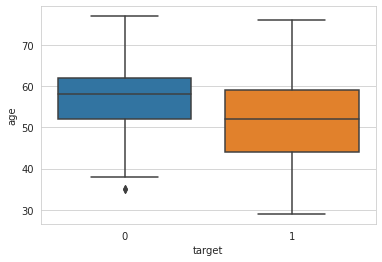

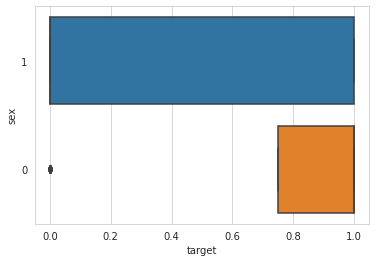

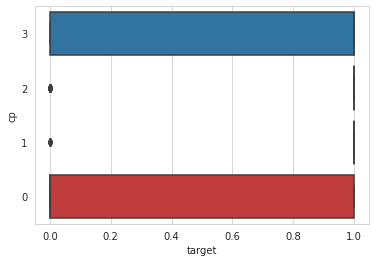

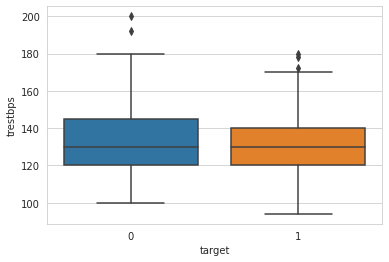

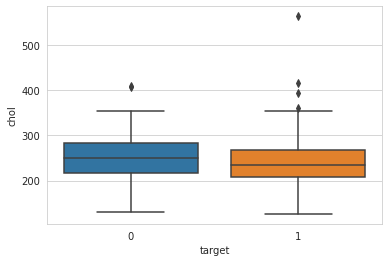

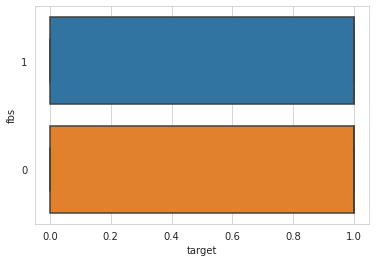

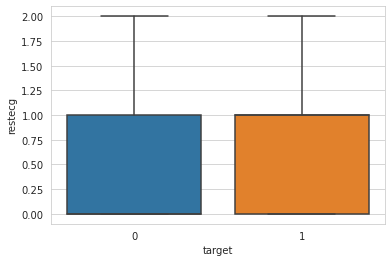

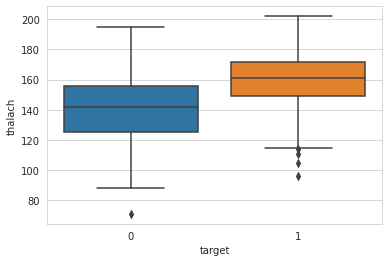

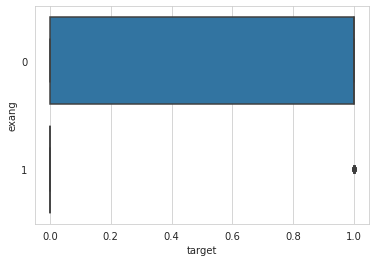

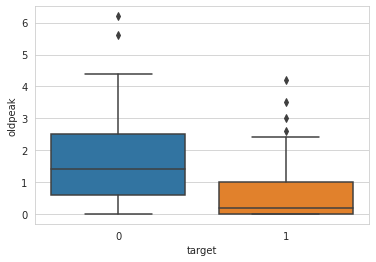

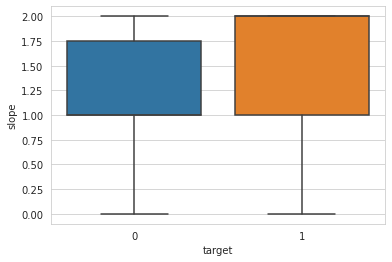

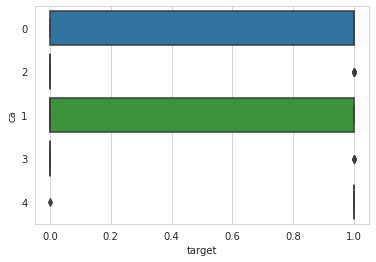

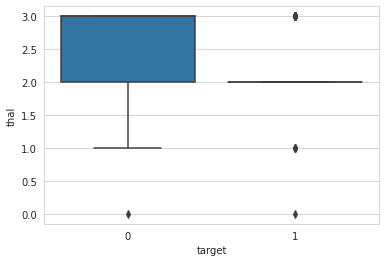

In [5]:
def plot_box(data, cols, col_x = 'target'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col_x, col, data=data)
        plt.xlabel(col_x) # Set text for the x axis
        plt.ylabel(col)# Set text for y axis
        plt.show()
        
num_cols = ['age','sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg','thalach', 
            'exang', 'oldpeak', 'slope', 'ca', 'thal']
plot_box(data, num_cols)

From box plot, It's seem like columns 'fbs' and 'restecg' is not effect to target.
Then I will drop these 2 columns.

In [6]:
#from box plot.Drop columns 'fbs','restecg'
data.drop(['fbs','restecg'],axis=1)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
#Chek missing value
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Train the model.

**Import Train Test Split**

In [8]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-2]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


**Train Model  ******

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model_1 = LogisticRegression()
model_2 = tree.DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
model_3 = GaussianNB()
model_4 = RandomForestClassifier(n_estimators=100,max_depth=4,criterion='gini')

#Create models list
models = [model_1, model_2, model_3, model_4]

#Find accuracy by using cross validation. In this case, I split data to 5 folds.   
for model in models:
    cvs = cross_val_score(model, X_train, y_train, cv=5)
    print('{0} score is {1}'.format(model,cvs.mean()))



LogisticRegression() score is 0.8185374149659864
DecisionTreeClassifier(criterion='entropy', max_depth=4) score is 0.7772108843537414
GaussianNB() score is 0.8022108843537415
RandomForestClassifier(max_depth=4) score is 0.8187074829931973


From above, I saw the model 1 and model 4 have more accuacy than others. I select these 2 models.

In [10]:
#cHECK Test Accuracy

for model in [model_1, model_4]:
    model = model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_test_pred)
    matrix = confusion_matrix(y_test, y_test_pred)
    print('{0} accuracy is {1}'.format(model, test_acc))
    

LogisticRegression() accuracy is 0.819672131147541
RandomForestClassifier(max_depth=4) accuracy is 0.8032786885245902


Test accuracy have no difference, but model 1 have higher train accuracy than model 4, Then model 1 or Logistic regression is appropiate to this data.